## Julia Primer 

This is a crash course on the Julia that you will need to know to complete the homeworks in this class. We are going to keep everything as simple as possible in the homeworks, oftentimes at the expense of speed. Because of this, we are going to be writing Julia in a way that is very similar to matlab. 

The great Brian Jackson (former TA of this course) made a fantastic [Julia Intro](https://github.com/Optimal-Control-16-745/JuliaIntro) that goes over everything one should know on their way to becoming a solid Julia programmer. This primer is simply a supplementary guide, and is not meant to replace the existing [Julia Intro](https://github.com/Optimal-Control-16-745/JuliaIntro). 

In [1]:
# some basic path stuff

dir = @__DIR__ # path to the directory holding this file 
dir_of_dir = dirname(dir) # path to the parent directory of the directory containing this file 
q2_path = joinpath(dir, "Q2.ipynb")

@show dir 
@show dir_of_dir
@show q2_path

dir = "c:\\Users\\quang\\robotics\\cmu\\16-745\\2025\\HW0_S25"
dir_of_dir = "c:\\Users\\quang\\robotics\\cmu\\16-745\\2025"
q2_path = "c:\\Users\\quang\\robotics\\cmu\\16-745\\2025\\HW0_S25\\Q2.ipynb"


"c:\\Users\\quang\\robotics\\cmu\\16-745\\2025\\HW0_S25\\Q2.ipynb"

In [3]:
# show current environment (list out the packages in the environment with status)
import Pkg 
Pkg.status()

Status `C:\Users\quang\.julia\environments\v1.10\Project.toml`
  [7073ff75] IJulia v1.26.0
  [91a5bcdd] Plots v1.40.9
  [44dac47c] VMLS v0.4.0 `https://github.com/VMLS-book/VMLS.jl#master`
  [37e2e46d] LinearAlgebra
  [2f01184e] SparseArrays v1.10.0


In [4]:
# first we are going to activate a specfic environment 
# activate the env in the directory 
Pkg.activate(dir) 

# now we can add a package if we want 
Pkg.add("BenchmarkTools")

  Activating project at `c:\Users\quang\HW0_S25`
   Resolving package versions...
   Installed GR_jll ─────────────── v0.73.12+0
   Installed IrrationalConstants ── v0.2.4
   Installed FiniteDiff ─────────── v2.26.2
   Installed SpecialFunctions ───── v2.5.0
   Installed XZ_jll ─────────────── v5.6.4+1
   Installed BenchmarkTools ─────── v1.6.0
   Installed StaticArraysCore ───── v1.4.3
   Installed CommonSubexpressions ─ v0.3.1
   Installed NaNMath ────────────── v1.1.1
   Installed DiffRules ──────────── v1.15.1
   Installed libpng_jll ─────────── v1.6.46+0
   Installed DiffResults ────────── v1.1.0
   Installed Setfield ───────────── v1.1.1
   Installed OrderedCollections ─── v1.8.0
   Installed ConstructionBase ───── v1.5.8
   Installed ArrayInterface ─────── v7.18.0
   Installed OpenSpecFun_jll ────── v0.5.6+0
   Installed Adapt ──────────────── v4.1.1
   Installed ColorSchemes ───────── v3.28.0
   Installed GR ─────────────────── v0.73.12
   Installed ForwardDiff ────────── v0.10

In [5]:
# we can also instantiate the environment 
Pkg.instantiate()      # download the packages listed in this environment 

In [4]:
# standard library stuff (not env specific)
# import LinearAlgebra # LinearAlgebra.norm()
# import LinearAlegbra as la # la.norm()
using LinearAlgebra # norm()
using Test

## 1. General syntax and Linear Algebra

In [7]:
a = 2 
b = 3.4
c = rand()  # uniform [0, 1]
d = randn() # gaussian [0, 1]

@show a 
@show a * b 
@show a ^ 2 
@show a + b; # jupyter always outputs the last thing in a cell, we can supress with ; 

a = 2
a * b = 6.8
a ^ 2 = 4
a + b = 5.4


In [9]:
# julia people love using latex characters 
Ω = 4.5 # I did this with "\Omega<tab>"

# we can also add dots 
ẋ = 2.4; # I did this with "x\dot<tab>"


In [13]:
# arrays 
vec1 = [1,2,3,4.0]  # vector, colons or commas work
mat = [1 2; 3 4.0] # matrix, must use colons between rows 

2×2 Matrix{Float64}:
 1.0  2.0
 3.0  4.0

In [14]:
vec1[1:2] # indexing starts at 1 

2-element Vector{Float64}:
 1.0
 2.0

In [17]:
mat[:, 2] # all rows, 2nd column 
mat[2, : ]

2-element Vector{Float64}:
 3.0
 4.0

In [19]:
# whenever I pull something 1 dimensional from a matrix, it will treat it as a vector
# row 2, columns 1:2 (automatically converts to vector)
mat[2,1:2]

2-element Vector{Float64}:
 3.0
 4.0

In [21]:
# if we want a matrix we can get it like this
reshape(mat[2,1:2], 1, 2)

1×2 Matrix{Float64}:
 3.0  4.0

In [29]:
# I can edit these elements 
vec1[3] = 100;
@show vec1 

mat[1,1] = 20
@show mat

vec1 = [1.0, 2.0, 100.0, 4.0]
mat = [20.0 2.0; 3.0 4.0]


2×2 Matrix{Float64}:
 20.0  2.0
  3.0  4.0

In [24]:
# matrix multiplication
A = randn(2,2)
B = randn(2,2)
C = A * B 
D = A' * A # ' is transpose 

2×2 Matrix{Float64}:
  4.67461   -0.650634
 -0.650634   0.188982

In [34]:
# matrix vector multiplication 
A = randn(2, 2)
b = randn(2)
c = A*b
d = b' * A 


1×2 adjoint(::Vector{Float64}) with eltype Float64:
 -1.15271  -0.767233

In [26]:
size(A)

(2, 2)

In [27]:
size(b)

(2,)

In [5]:
# identity matrix is just I 
@show identity_2x2 = I(2) # we can specify a size 

@show zeros(2,2) + I # or we can just add it to something with I 

identity_2x2 = I(2) = Bool[1 0; 0 1]
zeros(2, 2) + I = [1.0 0.0; 0.0 1.0]


2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

### 1.1 Solving Linear Systems

In [37]:
# now let's solve some linear systems 
# A * x = b 

x = A\b 
@test norm(A*x-b) < 1e-10

Test Passed

In [16]:
# matrix factorizations 

# if I know something about the structure of my linear system I can 
# choose how to factorize it

# create a random positive definite matrix 
# pd matrix will work for all factorizations 
A = randn(3, 3)

A = A'*A + I 

# cholesky is the fastest factorization, but only works on positive definite matrices 
# factorize into A = L*L', where L is lower triangular
chol_factor = cholesky(A)

L = chol_factor.L
@test norm(L*L'-A) < 1e-10

qr_factor = qr(A)
Q = qr_factor.Q
R = qr_factor.R 
@test norm(Q*R-A) < 1e-10

lu_factor = lu(A)
L = lu_factor.L 
U = lu_factor.U 
@test norm(L*U-A) < 1e-10

Test Passed

In [20]:
# I can solve this linear system with these factors 
b = randn(3)

# solve x = A\b using our factors 
x1 = chol_factor\b 
x2 = qr_factor\b
x3 = lu_factor\b 

@test norm(x1-x2) < 1e-10
@test norm(x1-x3) < 1e-10


Test Passed

In [25]:
#ranges 
idx = 0:2:10
list = [x for x in idx]

idx = range(0, 10, step = 2)
idx = range(0, 10, length = 6)

list = [x for x in idx]

6-element Vector{Float64}:
  0.0
  2.0
  4.0
  6.0
  8.0
 10.0

## 2. Functions and Types

In [28]:
# for loops
for i=1:5
    println("Here is println output: ", i) # print line 
    @show i 
end

Here is println output: 1
i = 1
Here is println output: 2
i = 2
Here is println output: 3
i = 3
Here is println output: 4
i = 4
Here is println output: 5
i = 5


In [30]:
# basic type information 
a = randn(2)::Vector{Float64}
@show typeof(a)

@show eltype(a)

typeof(a) = Vector{Float64}
eltype(a) = Float64


Float64

In [32]:
b = [1, 3]
@show typeof(b)
@show eltype(b)

typeof(b) = Vector{Int64}
eltype(b) = Int64


Int64

In [36]:
A = randn(2,2)::Matrix{Float64}
@show typeof(A)

B = [1 0; 0 3]::Matrix{Int64}
@show typeof(B)

a = 4.3::Float64
@show typeof(a)

typeof(A) = Matrix{Float64}
typeof(B) = Matrix{Int64}
typeof(a) = Float64


Float64

In [39]:
# list comprehension
x = [i for i=1:2:20]

10-element Vector{Int64}:
  1
  3
  5
  7
  9
 11
 13
 15
 17
 19

In [45]:
X = [randn(2) for i=1:3]

3-element Vector{Vector{Float64}}:
 [0.13614835350754317, 1.6968127867245995]
 [-0.8045501456486379, -2.7613478162810368]
 [-0.1994215477431119, 0.49532545320177757]

In [49]:
# we can convert a vector of vectors 
# to a matrix with the following 

# this is the same as hcat(X[1], X[2], X[3])
X_matrix = hcat(X...)

2×3 Matrix{Float64}:
 0.136148  -0.80455  -0.199422
 1.69681   -2.76135   0.495325

In [50]:
# we can also do vectors of matrices 

X = [randn(2,2) for i=1:3]

3-element Vector{Matrix{Float64}}:
 [-0.3279796917140101 1.4633729862855536; -1.9571818672551786 0.6193451700027254]
 [1.1281161971240425 0.8153293831917423; 0.371454267063904 1.1734136655029854]
 [-0.31643691032892785 1.2225893150807616; 0.8076671638315585 0.20408490732657328]

In [52]:
function f(x,b)
    return b*x
end

output = f(randn(3), 2.4)

3-element Vector{Float64}:
 -0.9696463709388641
 -1.0145501392510898
 -0.8716500758669519

In [53]:
# we can type the inputs and the outputs to a function if we want to 
function f(x::Vector, b::Float64)::Matrix 
    # this takes in the following: 
    #   x: a vector(can be a vector of anything)
    #   b: a float 
    # and outputs a matrix 
    return b * x * x'
end

output = f(randn(3), 2.4)

3×3 Matrix{Float64}:
  1.61112   -0.271293   -4.01734
 -0.271293   0.0456825   0.676472
 -4.01734    0.676472   10.0173

In [36]:
# this is useful for 2 reasons:
# 1. it helps us avoid bugs by specifying the types we expect 
# 2. it allows for multiple dispatch

# here's what I mean by multiple dispatch
function print_my_type(a::Float64)
    println("thanks for inputting a ~float~")
end
print_my_type(3.4)

thanks for inputting a ~float~


In [38]:
# this error is saying it doesn't have a method for `print_my_type(::Int64)`
# but the closest it found was `print_my_type(::Float64)`

# so let's write a new one 
function print_my_type(a::Int64)
    println("thanks for inputting an ~integer~")
end
print_my_type(3)

# these two functions have the same name, so the version that gets 
# called is determined by the type of the input 

thanks for inputting an ~integer~


## 2. Things to watch out for

In [54]:
# global and local scope 

# everything so far has been in global scope, this means if I create a variable 
x = 4.6

function myf()
    println("I'm printing x, even though it wasn't passed in")
    println("x: ", x)
end

myf()

I'm printing x, even though it wasn't passed in
x: 4.6


In [55]:
# this is super dangerous, and as a result global variables should NEVER be used 

# --------UNLESS------------
# we make it a const, which means we can't change it 

const x_const = 4.3

# now we should feel free to use it wherever

4.3

In [41]:
# to avoid "polluting" our workspace with global variables, we often times 
# wrap things in a let end 

function test_local_scope()
    # since there are no inputs to this function, it will 
    # only know about global variables 
    
    println("here is global_var: ", global_var)
    println("here is local_var: ", local_var) 
end

# global variable 
const global_var = 23

let 
    
    # local variable 
    local_var = 45 
    
    test_local_scope()
    
end

here is global_var: 23


UndefVarError: UndefVarError: `local_var` not defined

In [57]:
# here is an example of global 
x = 3.4
function f1()
    if @isdefined(x)
        println("Yeah I know about x")
        println("x: ", x)
    end
end
f1()

Yeah I know about x
x: 3.4


In [64]:
# functions that can modify their inputs in place 
function mf!(x::Vector)
    x[2] = 140
    return nothing
end

let
    input = [5,9]
    println("input before: ", input)
    
    # call our function which modifies the input
    mf!(input)

    println("input after: ", input)
end

input before: [5, 9]
input after: [5, 140]


In [66]:
# functions that modify the input have a ! at the end of the title 
x = [4, 1, 3, 2]

println("Here is x: x = ", x)
println("Here is the sorted version of x: ", sort(x))
println("but x is unchanged: x = ", x)

# now I will sort the vector in place 
# ! means it will modify the input 
sort!(x)

println("here is the modified x (it's sorted now): x = ", x)

Here is x: x = [4, 1, 3, 2]
Here is the sorted version of x: [1, 2, 3, 4]
but x is unchanged: x = [4, 1, 3, 2]
here is the modified x (it's sorted now): x = [1, 2, 3, 4]


In [45]:
# we can apply any function to elements of an array with a . 
@show abs(3)
x = randn(4)
@show x
@show abs.(x)
X = randn(2,2)
@show X 
@show abs.(X)

abs(3) = 3
x = [-1.4742869679240944, 0.03439647034230791, 0.05027027567873347, -1.2313940109155692]
abs.(x) = [1.4742869679240944, 0.03439647034230791, 0.05027027567873347, 1.2313940109155692]
X = [-0.8036307762204353 0.8490459125288787; 1.2399773549307613 0.627194010408189]
abs.(X) = [0.8036307762204353 0.8490459125288787; 1.2399773549307613 0.627194010408189]


2×2 Matrix{Float64}:
 0.803631  0.849046
 1.23998   0.627194

In [46]:
# even a vector of vectors 
X = [randn(2) for i = 1:3]

@show X
@show norm.(X)

X = [[1.108393320732633, 0.8357644907054981], [0.0675550554532718, 0.07081946674085282], [0.8248492968116291, -0.7862424738346211]]
norm.(X) = [1.388177955944026, 0.09787278675277099, 1.13954095587312]


3-element Vector{Float64}:
 1.388177955944026
 0.09787278675277099
 1.13954095587312

## 3. Plotting

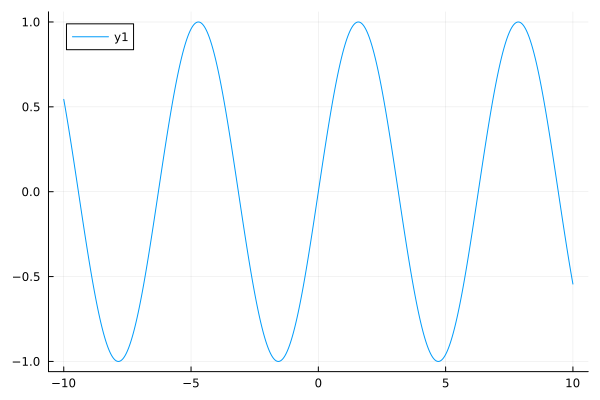

In [71]:
# plotting 
using Plots 
x = -10:0.001:10

plot(x, sin.(x))

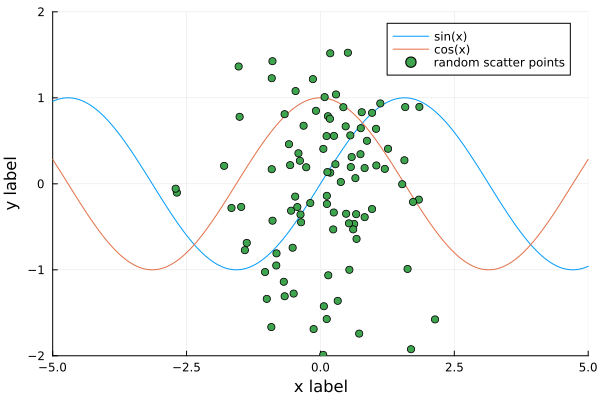

In [74]:
# plot multiple 
plot(x, sin.(x), label = "sin(x)", xlabel = "x label", ylabel = "y label", xlim = (-5, 5), ylim = (-2,2))

plot!(x, cos.(x), label = "cos(x)")

scatter!(randn(100), randn(100), label = "random scatter points")

In [77]:
# plot a trajectory that is stored as a vector of vectors 

time_vec = 0:0.01:10

# create a trajectory as a vector of vectors 
X = [[exp(-t), exp(-.5*t), exp(-0.25*t)] for t in time_vec]

1001-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0]
 [0.9900498337491681, 0.9950124791926823, 0.9975031223974601]
 [0.9801986733067553, 0.9900498337491681, 0.9950124791926823]
 [0.9704455335485082, 0.9851119396030626, 0.9925280548191384]
 [0.9607894391523232, 0.9801986733067553, 0.9900498337491681]
 [0.951229424500714, 0.9753099120283326, 0.9875778004938814]
 [0.9417645335842487, 0.9704455335485082, 0.9851119396030626]
 [0.9323938199059483, 0.9656054162575665, 0.9826522356650732]
 [0.9231163463866358, 0.9607894391523232, 0.9801986733067553]
 [0.9139311852712282, 0.9559974818331, 0.9777512371933363]
 ⋮
 [4.918115678505129e-5, 0.007012927832585425, 0.08374322559219596]
 [4.869179609863181e-5, 0.0069779507091001875, 0.08353412900785037]
 [4.820730463239883e-5, 0.0069431480347461145, 0.083325554512083]
 [4.772763393680197e-5, 0.006908518939454532, 0.08311750080130256]
 [4.725273604437187e-5, 0.006874062557496249, 0.08290996657517266]
 [4.67825634649237e-5, 0.006839778027459933, 0.082702

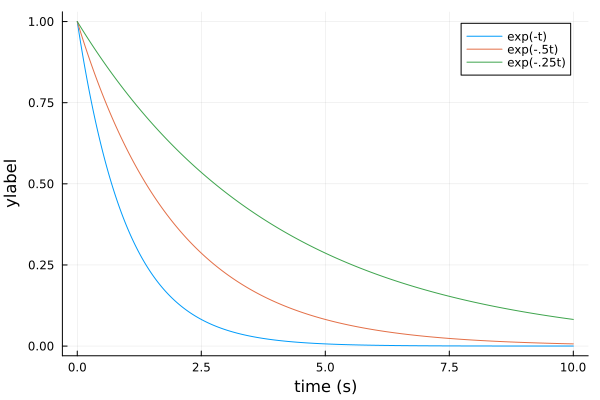

In [79]:
# convert this vector of vectors to a matrix 
Xmatrix = hcat(X...)

# plot this (DONT FORGET THE TRANSPOSE)

plot(time_vec, Xmatrix', label = ["exp(-t)" "exp(-.5t)" "exp(-.25t)"], ylabel = "ylabel", xlabel = "time (s)")

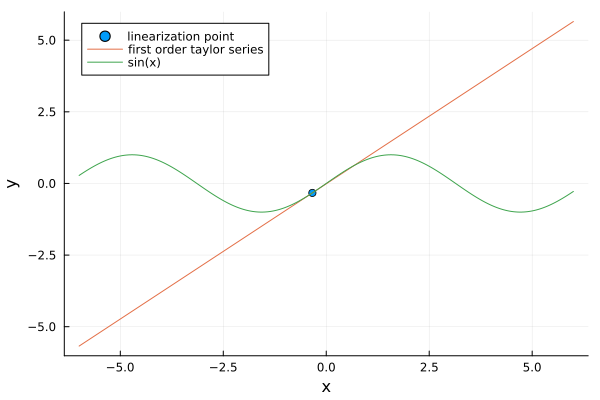

In [85]:
# x̄ = randn()
# return first order taylor approximation of f(x) near x̄
import ForwardDiff as FD

function taylor(f::Function, x̄::Float64, x::Float64)::Float64
    return f(x̄) + FD.derivative(f, x̄)*(x-x̄)
end

let
    x = -6:.01:6
    y = sin.(x)
    x̄ = randn()
    y2 = [taylor(sin, x̄, xi) for xi in x]
    scatter([x̄], [sin(x̄)], label = "linearization point")
    plot!(x, y2, label = "first order taylor series")
    display(plot!(x, y, label = "sin(x)", xlabel="x", ylabel="y"))
end

In [51]:
# NamedTuples 
params = (a = 5, b = 6, c = 7)
@show params.c

params.c = 7


7